## 载入数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [3]:
target_url = ("https://archive.ics.uci.edu/ml/machine-"
              "learning-databases/glass/glass.data")

In [4]:
columns_mapping = {
    'ID': 'ID',
    'RI': '折射率',
    'Na': '钠',
    'Mg': '镁',
    'Al': '铝',
    'Si': '硅',
    'K': '钾',
    'Ca': '钙',
    'Ba': '钡',
    'Fe': '铁',
    'Type': '类型',
}

try:
    df_glass = pd.read_csv("../../data/glass.csv", header=0)
except Exception as e:
    print(e)
    df_glass = pd.read_csv(target_url, header=None, prefix="V")
    df_glass.columns = columns_mapping.keys()
    df_glass.to_csv("../../data/glass.csv", index=False)

df_glass.head()

ID       RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0   1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1   2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2   3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3   4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4   5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

In [5]:
nrows, ncols = df_glass.shape
print("Number of Rows: ", nrows)
print("Number of Cols: ", ncols)

Number of Rows:  214
Number of Cols:  11


## 绘制玻璃数据的关联热图

In [9]:
df_glass_corr = df_glass.iloc[:, 1:-1].corr()
df_glass_corr

RI        Na        Mg        Al        Si         K        Ca  \
RI  1.000000 -0.191885 -0.122274 -0.407326 -0.542052 -0.289833  0.810403   
Na -0.191885  1.000000 -0.273732  0.156794 -0.069809 -0.266087 -0.275442   
Mg -0.122274 -0.273732  1.000000 -0.481799 -0.165927  0.005396 -0.443750   
Al -0.407326  0.156794 -0.481799  1.000000 -0.005524  0.325958 -0.259592   
Si -0.542052 -0.069809 -0.165927 -0.005524  1.000000 -0.193331 -0.208732   
K  -0.289833 -0.266087  0.005396  0.325958 -0.193331  1.000000 -0.317836   
Ca  0.810403 -0.275442 -0.443750 -0.259592 -0.208732 -0.317836  1.000000   
Ba -0.000386  0.326603 -0.492262  0.479404 -0.102151 -0.042618 -0.112841   
Fe  0.143010 -0.241346  0.083060 -0.074402 -0.094201 -0.007719  0.124968   

          Ba        Fe  
RI -0.000386  0.143010  
Na  0.326603 -0.241346  
Mg -0.492262  0.083060  
Al  0.479404 -0.074402  
Si -0.102151 -0.094201  
K  -0.042618 -0.007719  
Ca -0.112841  0.124968  
Ba  1.000000 -0.058692  
Fe -0.058692  1.000000

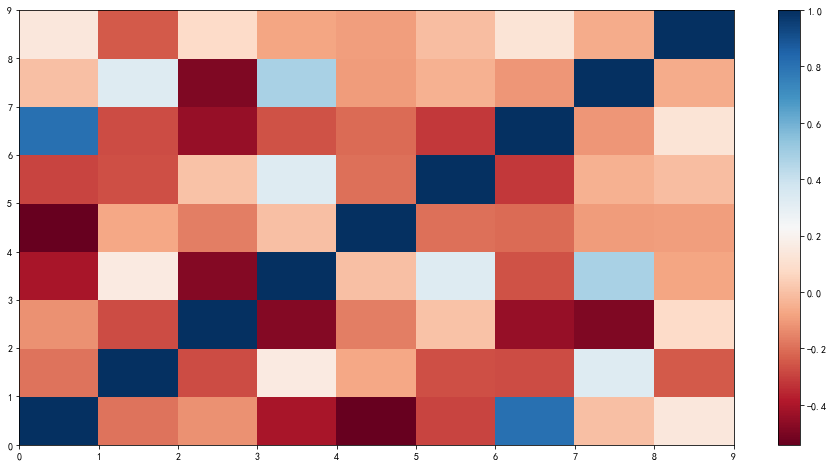

In [14]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)
pic = ax.pcolor(df_glass_corr, cmap=plt.cm.RdBu)
fig.colorbar(pic, ax=ax)
plt.show()

属性之间大多呈弱相关性，这是件好事。  
但标签没有出现在热图中（因为目标值只能取几个离散值中的一个，且离散值只代表类别，大小无意义）。这无疑减少了关联热图所能展示的信息。  